# Forecasting with FB Prophet

https://facebook.github.io/prophet/

From the facebook page...

"Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well."



This python program will forecast out the stock price of the chosen company AMD. 
This will be the first program of two to attempt to accurately forecast stick prices. 

Stock data is time series although there is no real seasionality persay although AMD may have some seasonality in there data due to an increase in their processors during the November and December time frames. Will this mean an increase in stock price? We will see. 

In [ ]:
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta
import pandas as pd
import pydata_google_auth
import pandas_datareader as web
import numpy as np

from fbprophet import Prophet

**There will be two ways we want to forecast. 
The first will be to take the daily data. 
The second method will be to resample the dataset to a Monthly and Yearly data set to compare with the daily.**

# Import / Scrape Data

In [ ]:
# Lets grab the data from Yahoo and store the vairable as amd which is the name of the stock
# Grab the data for AMD
amd = web.DataReader('AMD', data_source='yahoo', start = "2013-01-01", end = '2020-07-06')

# From here we can split the methods by storing different variables
# amd will ocntinue to be our original method to forecast by day
# The second method will be stored in two variables

amd_m2_year = amd
amd_m2_month = amd

# This is necessary as we want to resample the data which summarizes the data into months as well as years
# To do this in the next section we need to take the index and pop it off to make it a column as 
# the current index is the date format and we cannot run Prophet without a data column. 

# Resample split data from above

In [ ]:
# Resample the data to month and year
# Gives us different forecasting options

amd_month = amd_m2_month.resample("M").mean()
amd_quarter = amd_m2_month.resample("3M").mean()
amd_year = amd_m2_year.resample("Y").mean()

Re-Index the data

This has to  be done after resampling
Average has to be run. 

(.sum() can also be used but not relevant since we dont want a summary of stock prices)

In [ ]:
# This resets the index and pushes out the Date which was our original index and now we can use it for forecasting
# If drop is = to True, this will drop the Date index since this was our original index and we will get a default index. 
# We want to set drop = False since we want a new index but still want to keep the Date column for forecasting. 
# We also want to keep inplace as True. If False, the Date column stays in the index. 

amd.reset_index(inplace = True, drop = False)

# The same will be done on the Month, Quarter and Year versions of the data

amd_month.reset_index(inplace = True, drop = False) 
amd_quarter.reset_index(inplace = True, drop = False)
amd_year.reset_index(inplace = True, drop = False)

In [ ]:
amd

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-01-02,2.570000,2.450000,2.550000,2.530000,27214800,2.530000
1,2013-01-03,2.590000,2.460000,2.520000,2.490000,24966900,2.490000
2,2013-01-04,2.590000,2.490000,2.510000,2.590000,22054200,2.590000
3,2013-01-07,2.700000,2.600000,2.610000,2.670000,25575200,2.670000
4,2013-01-08,2.760000,2.640000,2.720000,2.670000,29140800,2.670000
...,...,...,...,...,...,...,...
1885,2020-06-29,50.279999,48.419998,50.150002,50.279999,49905800,50.279999
1886,2020-06-30,52.770000,50.820000,51.160000,52.610001,42275700,52.610001
1887,2020-07-01,52.869999,51.599998,52.630001,52.580002,32370900,52.580002
1888,2020-07-02,53.189999,52.049999,53.029999,52.340000,29081400,52.340000


No handles with labels found to put in legend.


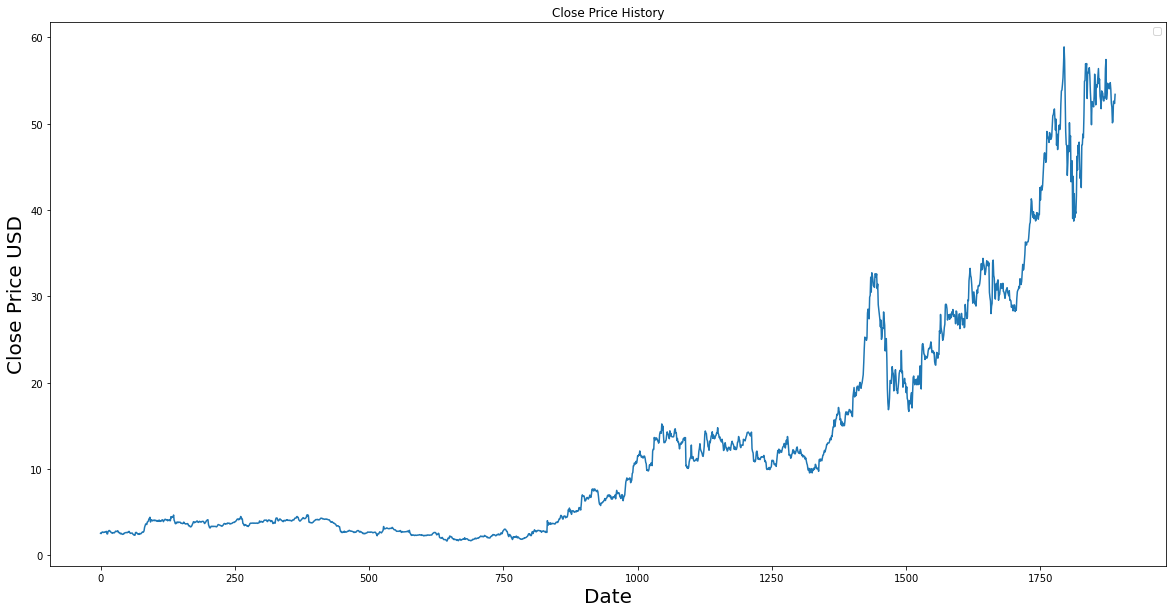

In [ ]:
# Viaulize the price history of AMD stock
plt.figure(figsize=(20,10))
plt.title("Close Price History")
plt.plot(amd['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
amd_month 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-01-31,2.726667,2.592857,2.675714,2.654286,2.756779e+07,2.654286
1,2013-02-28,2.683158,2.582105,2.650000,2.624737,1.518843e+07,2.624737
2,2013-03-31,2.604500,2.518500,2.566500,2.561000,1.283063e+07,2.561000
3,2013-04-30,2.550909,2.442273,2.495000,2.510909,1.842465e+07,2.510909
4,2013-05-31,3.989545,3.775000,3.858636,3.906364,4.346387e+07,3.906364
...,...,...,...,...,...,...,...
86,2020-03-31,46.059091,42.778182,44.465909,44.424091,9.526760e+07,44.424091
87,2020-04-30,53.435714,50.806667,52.033809,52.063810,8.164641e+07,52.063810
88,2020-05-31,54.602000,52.276000,53.568000,53.503000,5.965026e+07,53.503000
89,2020-06-30,54.541363,52.498182,53.720000,53.490000,5.338069e+07,53.490000


No handles with labels found to put in legend.


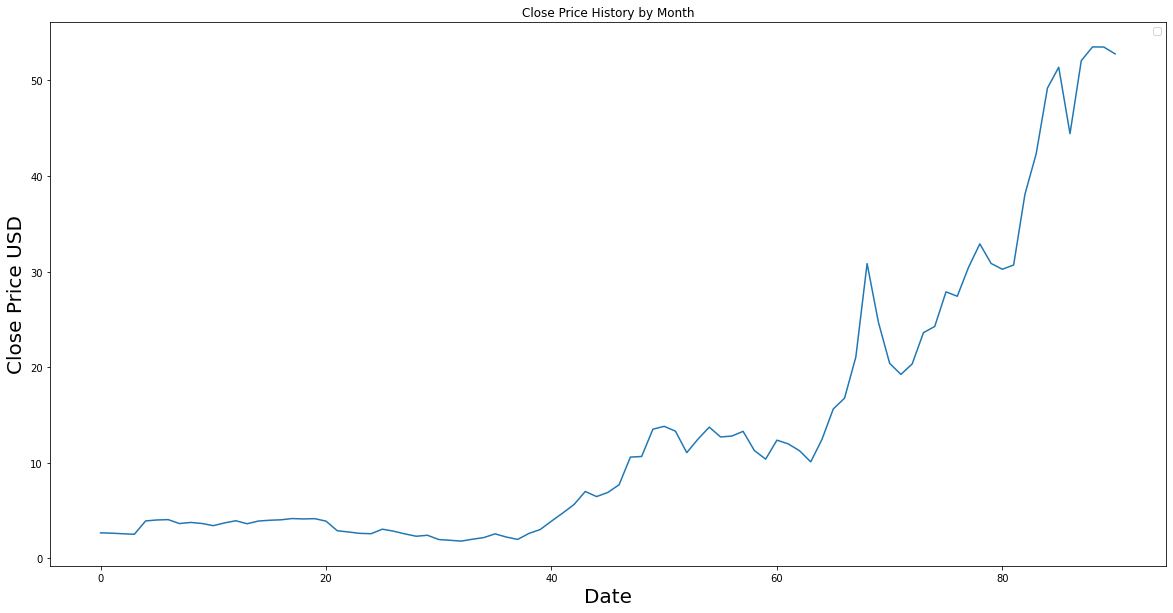

In [ ]:
# Viaulize the price history of AMD stock
plt.figure(figsize=(20,10))
plt.title("Close Price History by Month")
plt.plot(amd_month['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
amd_quarter

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-01-31,2.726667,2.592857,2.675714,2.654286,2.756779e+07,2.654286
1,2013-04-30,2.609672,2.510820,2.566721,2.562787,1.558254e+07,2.562787
2,2013-07-31,4.059375,3.893594,3.979531,3.984219,3.557207e+07,3.984219
3,2013-10-31,3.734615,3.615692,3.679385,3.669231,2.916816e+07,3.669231
4,2014-01-31,3.735323,3.625161,3.682903,3.681774,2.251086e+07,3.681774
5,2014-04-30,3.899836,3.778197,3.840820,3.834262,2.231302e+07,3.834262
6,2014-07-31,4.159219,4.032969,4.091406,4.096875,2.843739e+07,4.096875
7,2014-10-31,3.682615,3.570154,3.628308,3.612000,2.320845e+07,3.612000
8,2015-01-31,2.688689,2.585082,2.639344,2.637377,1.562466e+07,2.637377
9,2015-04-30,2.855161,2.750645,2.801290,2.800806,1.523658e+07,2.800806


No handles with labels found to put in legend.


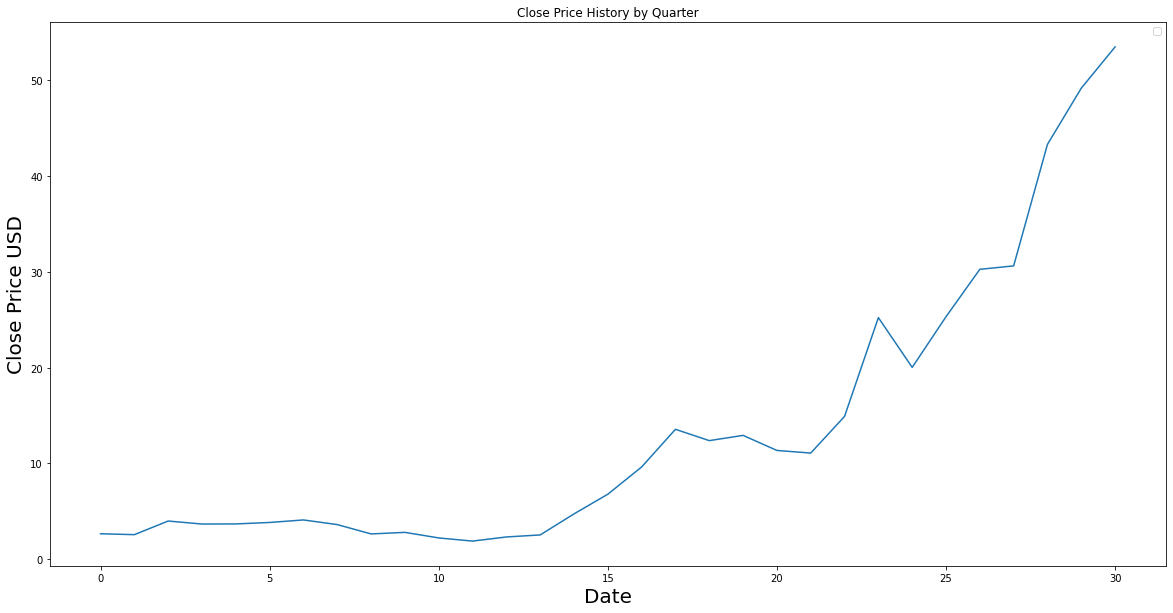

In [ ]:
# Viaulize the price history of AMD stock
plt.figure(figsize=(20,10))
plt.title("Close Price History by Quarter")
plt.plot(amd_quarter['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
amd_year

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-12-31,3.438373,3.316111,3.382222,3.378571,2.510814e+07,3.378571
1,2014-12-31,3.726389,3.608532,3.668175,3.662064,2.372125e+07,3.662064
2,2015-12-31,2.380873,2.280992,2.327579,2.331746,1.363467e+07,2.331746
3,2016-12-31,5.383849,5.114524,5.241508,5.254921,3.070861e+07,5.254921
4,2017-12-31,12.669283,12.164263,12.436614,12.411673,6.516145e+07,12.411673
5,2018-12-31,17.667610,16.729880,17.209681,17.214502,8.461100e+07,17.214502
6,2019-12-31,30.468690,29.384960,29.914921,29.941071,6.630142e+07,29.941071
7,2020-12-31,51.804063,49.454844,50.661250,50.665078,6.864463e+07,50.665078


No handles with labels found to put in legend.


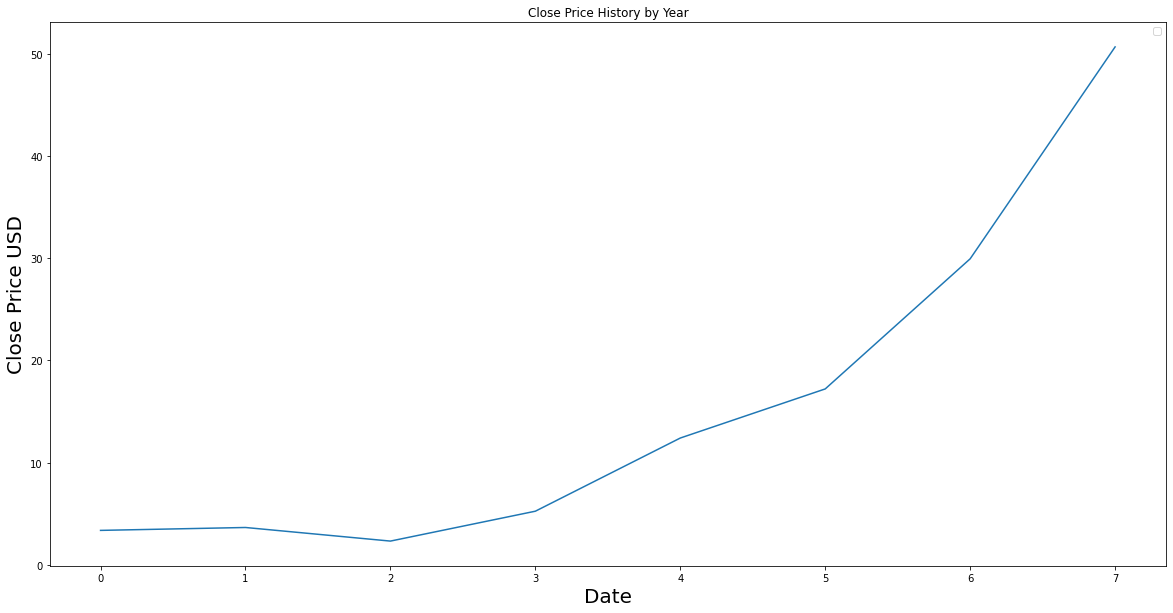

In [ ]:
# Viaulize the price history of AMD stock
plt.figure(figsize=(20,10))
plt.title("Close Price History by Year")
plt.plot(amd_year['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD', fontsize = 20)
plt.legend()
plt.show()

Export the data out to excel if desired

In [ ]:
# library needed for google importing or exporting
# from google.colab import files

# name your csv
# amd.to_csv('amd.csv') 

# download said csv
# files.download('amd.csv') 

In [ ]:
# Check to see what kind of data type the data column in
amd.Date.dtype

dtype('<M8[ns]')

In [ ]:
amd_month

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-31,57.260000,54.450000,56.190000,55.740000,578923500,55.740000
2013-02-28,50.980000,49.060000,50.350000,49.869999,288580100,49.869999
2013-03-31,52.090000,50.370000,51.330000,51.220000,256612600,51.220000
2013-04-30,56.120000,53.730001,54.890001,55.240000,405342300,55.240000
2013-05-31,87.770000,83.050001,84.890001,85.940001,956205200,85.940001
...,...,...,...,...,...,...
2020-02-29,996.809998,950.430000,971.290001,976.159996,1283117400,976.159996
2020-03-31,1013.300003,941.119995,978.249996,977.330006,2095887300,977.330006
2020-04-30,1122.150002,1066.939999,1092.709999,1093.340004,1714574600,1093.340004


No handles with labels found to put in legend.


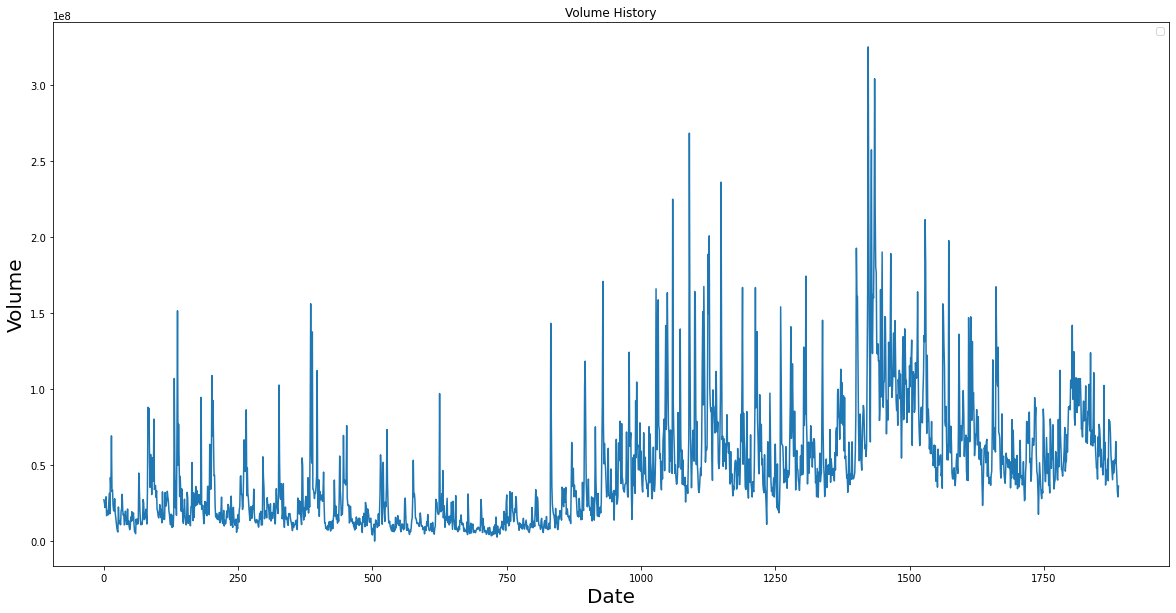

In [ ]:
# Viaulize the price history of AMD stock
plt.figure(figsize=(20,10))
plt.title("Volume History")
plt.plot(amd['Volume'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize = 20)
plt.legend()
plt.show()

# Data Prepearation

Daily Data -

In [ ]:
# The closing price will be what we forecast
amd_close = amd.drop(['High','Low','Open','Volume','Adj Close'], axis = 1)

# If the data is not in the appropriate format this code will change the date
# column to date time and the second line will convert Y or the price to a number
# In this case nothing is needed to be done
# amd_close['ds'] = pd.to_datetime(amd_close['Date'])
# amd_close['y'] = amd_close['Close'].astype(float)

# Rename the columns
amd_close = amd_close.rename(columns={'Date': 'ds', 'Close': 'y'})
amd_close

,ds,y
0,2013-01-02,2.530000
1,2013-01-03,2.490000
2,2013-01-04,2.590000
3,2013-01-07,2.670000
4,2013-01-08,2.670000
...,...,...
1881,2020-06-23,53.990002
1882,2020-06-24,52.389999
1883,2020-06-25,51.930000
1884,2020-06-26,50.099998


Monthly Data - 

Quarterly Data - 

Yearly Data - 

# Modeling

In [ ]:
# Change the standard 80% to 95%
model = Prophet(interval_width=0.95)
# Fit the model
model.fit(amd_close)
# Forecast the future dates based on the data
future_dates = model.make_future_dataframe(periods=365)
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2246,2021-06-25,77.484131,59.258078,97.133758
2247,2021-06-26,77.845887,58.750052,97.799303
2248,2021-06-27,77.895677,58.103898,98.115010
2249,2021-06-28,77.664924,58.010174,97.089671
2250,2021-06-29,77.768913,56.237708,97.527965


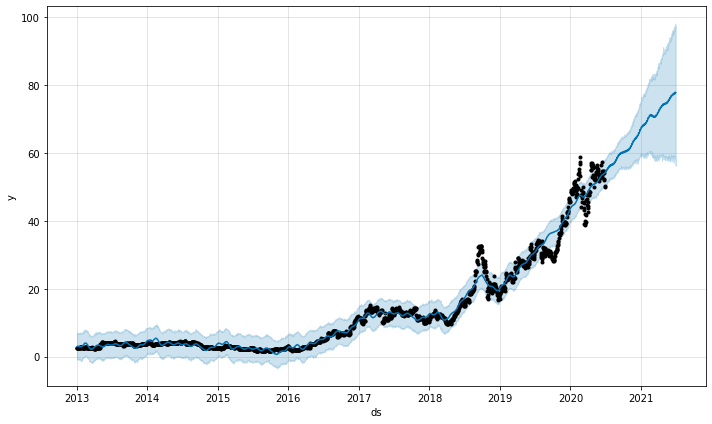

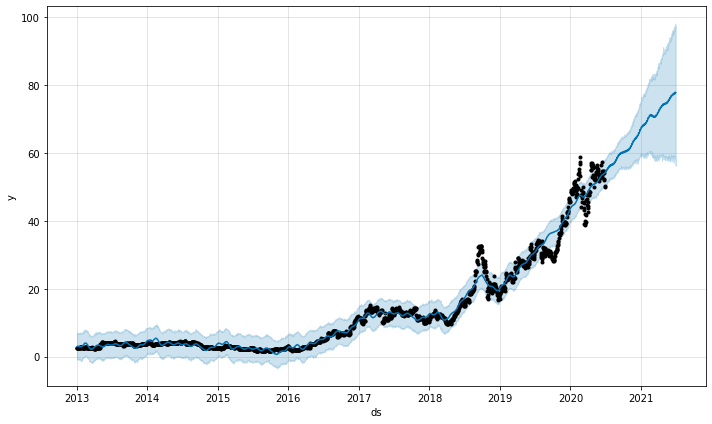

In [ ]:
model.plot(forecast,
              uncertainty=True)